In [2]:
# import modules
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [4]:
# load monthly gridded SST data 
ds=xr.open_dataset('cosine-weight/ERSST_monthly_1990_2021_2degree_global.nc')
sst=ds.sst

In [53]:
sst.attrs

{'long_name': 'Monthly Means of Sea Surface Temperature',
 'units': 'degC',
 'var_desc': 'Sea Surface Temperature',
 'level_desc': 'Surface',
 'statistic': 'Mean',
 'dataset': 'NOAA Extended Reconstructed SST V5',
 'parent_stat': 'Individual Values',
 'actual_range': array([-1.8    , 42.32636], dtype=float32)}

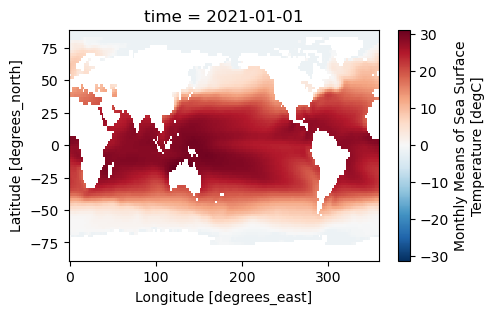

In [107]:
plt.figure(figsize=(5,3))

sst[-1].plot()

In [36]:
# Remove seasonality of SST and make SST anomalies for each grid
sst_clim=sst.groupby('time.month').mean() # find the monthly climatology for each grid
ssta=sst.groupby('time.month')-sst_clim # remove monthly climatology from each grid

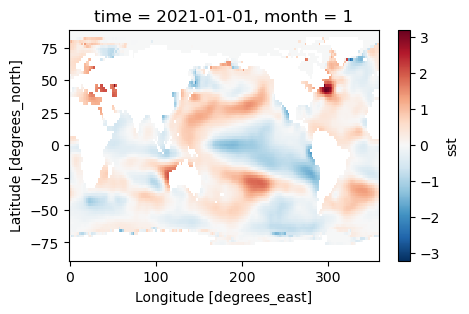

In [108]:
plt.figure(figsize=(5,3))

ssta[-1].plot()

In [ ]:
## Lets estimate the FFT of global tropic's  (5S-5N band) SSTA and check the dominant variabilites.
# Equatorial region only

In [60]:
ssta_equator=ssta.sel(lat=slice(5,-5)).mean(dim=['lat','lon'])

Text(0, 0.5, 'SSTA (°C)')

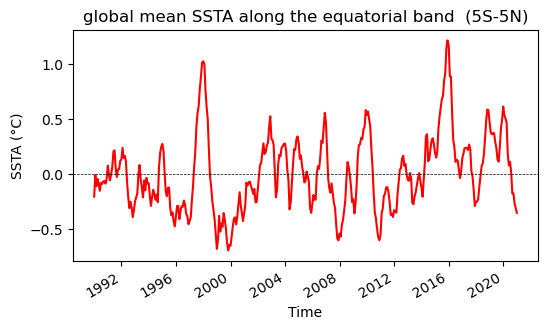

In [72]:
plt.figure(figsize=(6,3))
ssta_equator.plot(color='r')
plt.axhline(y=0,linestyle='--',color='k',lw=0.5)
plt.title('global mean SSTA along the equatorial band  (5S-5N)')
plt.ylabel('SSTA (°C)')

In [ ]:
# function to find fft power sectra

#input 
# data and sampling frequency

# output
# periods, power , normalised power of signal

from numpy.fft import fft,fftfreq,ifft

def fft_(data,fx): # input data and sampling rate 
    signal=data
    n=len(signal) # tot number of data points 
    x=np.linspace(0,fx,n) # making n timesteps 
    freqs=fftfreq(n) # making all +ve -ve freq >> -0.5 to 0.5
    mask = freqs> 0 # only +ve freq
    fft_vals=fft(signal)
    fft_theo=2.0*np.abs(fft_vals/n) # theoratical ampli value
    ps=2.0*np.abs(fft_vals/n)**2 # power spectra
    
    times=1/freqs
    times[freqs==0]=n
    return(times[mask],ps[mask],ps[mask]/signal.var()) # fft >>  period= 1/frequency,  power, normalised power

In [78]:
# lets consider frequency in month scale not in seconds
period_,power_,norm_power_=fft_(ssta_equator.values,fx=1) # data and sampling frequency, fx. fx=1 month here

/var/folders/zy/5d9vqqrj7llbc538d6xnbl400000gn/T/ipykernel_39685/4216233218.py:14: RuntimeWarning: divide by zero encountered in true_divide
  times=1/freqs


([<matplotlib.axis.XTick at 0x7fe3caaff6d0>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(7, 0, '7'),
  Text(10, 0, '10')])

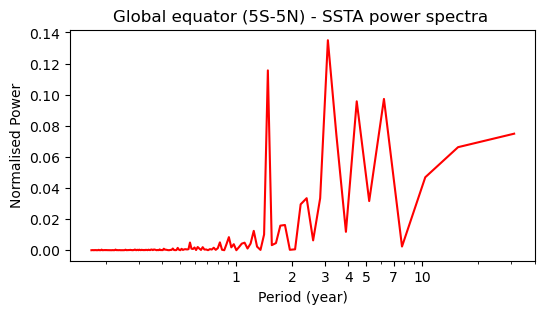

In [104]:
# FFT plot 
# time axis converted to year by dividing period (in months) with 12
plt.figure(figsize=(6,3))
plt.semilogx(period_/12,norm_power_,color='r') # for easy interpretattion 
plt.xlabel('Period (year)')
plt.ylabel('Normalised Power')
plt.title('Global equator (5S-5N) - SSTA power spectra ')
custom_ticks = [1, 2, 3, 4,5, 7, 10]
plt.xticks(custom_ticks, custom_ticks)

In [ ]:
# ENSO band 2-7 years

# ENSO signal  is evident 